In [14]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

# K-Means Clustering with Gnostic Weights

### **Overview**
The **Machine Gnostics KMeansClustering** provides robust unsupervised clustering using the same Riemannian geometric framework as our supervised models. Unlike traditional K-means, it automatically handles outliers and noisy data through **adaptive gnostic weights**.

Key advantages for clustering:
- Automatic robustness to outliers and noise
- Dynamic weighting reduces impact of anomalous points
- Interpretable sample weights for outlier detection
- Comprehensive history tracking for convergence analysis
- Gnostic characteristics for cluster quality assessment

---

### **Theoretical Background**

The KMeansClustering implements **Gnostic Weighted Clustering** with these key features:

*   **Thermodynamic Clustering:**
    Rather than minimizing only inertia, the model optimizes through the **Ideal Gnostic Cycle (IGC)**, balancing information maximization and entropy minimization.

*   **Adaptive Sample Weighting:**
    Each sample receives a **Gnostic Weight** based on how well it fits within its cluster. Outliers and noisy points automatically receive lower weights through the computed gnostic characteristics.

*   **Initialization Methods:**
    Supports both random initialization and K-means++ for better initial centroid placement, reducing sensitivity to starting conditions.

*   **Convergence Monitoring:**
    Tracks loss, rentropy, and gnostic characteristics across iterations, providing detailed insights into the clustering process.

***

## Example 1: Basic K-Means Clustering

A simple example showing how to use KMeans clustering on a synthetic dataset with clear cluster structure.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from machinegnostics.models import KMeansClustering
from machinegnostics.data import make_classification_check_data


# Generate data
X, y = make_classification_check_data(n_samples=100, n_classes=3, n_features=2, separability=2.5)

print(f"Dataset generated: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Feature 1 range: [{X[:, 0].min():.2f}, {X[:, 0].max():.2f}]")
print(f"Feature 2 range: [{X[:, 1].min():.2f}, {X[:, 1].max():.2f}]")

Dataset generated: 100 samples, 2 features
Feature 1 range: [-6.37, 3.00]
Feature 2 range: [-4.11, 3.30]


In [16]:
# Fit the K-Means model with 3 clusters
model = KMeansClustering(
    n_clusters=3,
    max_iter=100,
    tolerance=1e-4,
    init='kmeans++',  # Use k-means++ initialization
    verbose=True,
)

# Fit and predict
model.fit(X)
labels = model.predict(X)

print("\nModel fitted successfully!")
print(f"Number of iterations: {len(model._history) - 1}")
print(f"Final centroids:\n{model.centroids}")
print(f"\nCluster labels (first 10): {labels[:10]}")

2026-02-03 17:03:37,470 | KMeansClustering | INFO | KMeansClustering initialized.
2026-02-03 17:03:37,471 | KMeansClustering | INFO | KMeansClustering initialized:
2026-02-03 17:03:37,471 | KMeansClustering | INFO | KMeansClustering initialized:
2026-02-03 17:03:37,472 | KMeansClustering | INFO | KMeansClustering initialized:
2026-02-03 17:03:37,472 | KMeansClustering | INFO | HistoryClusteringBase initialized.
2026-02-03 17:03:37,472 | KMeansClustering | INFO | KMeansClustering initialized:
2026-02-03 17:03:37,473 | KMeansClustering | INFO | Starting fit process for KMeansClustering.
2026-02-03 17:03:37,476 | KMeansClustering | INFO | Starting fit input/output processing for clustering.
2026-02-03 17:03:37,476 | KMeansClustering | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-02-03 17:03:37,477 | KMeansClustering | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-02-03 17:03:37,477 | KMeansClustering | INFO | Starting fit process for History


Model fitted successfully!
Number of iterations: 10
Final centroids:
[[-4.75523319 -3.47649063]
 [ 0.93781386 -2.69838109]
 [ 1.77744612  2.34794044]]

Cluster labels (first 10): [1 1 1 2 2 0 0 0 2 2]


In [17]:
# Calculate cluster statistics
unique_labels, counts = np.unique(labels, return_counts=True)

print("Cluster Statistics:")
print("=" * 50)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} samples ({count/len(labels)*100:.1f}%)")
print("=" * 50)

# Calculate score (negative inertia)
score = model.score(X)
inertia = -score  # Convert to positive inertia
print(f"\nInertia (sum of squared distances): {inertia:.2f}")

2026-02-03 17:03:37,520 | KMeansClustering | INFO | Calculating inertia score with KMeansClustering.
2026-02-03 17:03:37,521 | KMeansClustering | INFO | Starting score input/output processing for clustering.
2026-02-03 17:03:37,521 | KMeansClustering | INFO | Checking input X of type: <class 'numpy.ndarray'>
2026-02-03 17:03:37,522 | KMeansClustering | INFO | Identifying and converting data of type: <class 'numpy.ndarray'>
2026-02-03 17:03:37,522 | KMeansClustering | INFO | Computing inertia score for ClusteringCalBase.
2026-02-03 17:03:37,523 | KMeansClustering | INFO | Starting prediction for ClusteringCalBase.
2026-02-03 17:03:37,523 | KMeansClustering | INFO | Computing distances between samples and centroids.
2026-02-03 17:03:37,524 | KMeansClustering | INFO | Assigning samples to clusters.


Cluster Statistics:
Cluster 0: 34 samples (34.0%)
Cluster 1: 33 samples (33.0%)
Cluster 2: 33 samples (33.0%)

Inertia (sum of squared distances): 79.49


### Basic Visualization: Clusters and Centroids

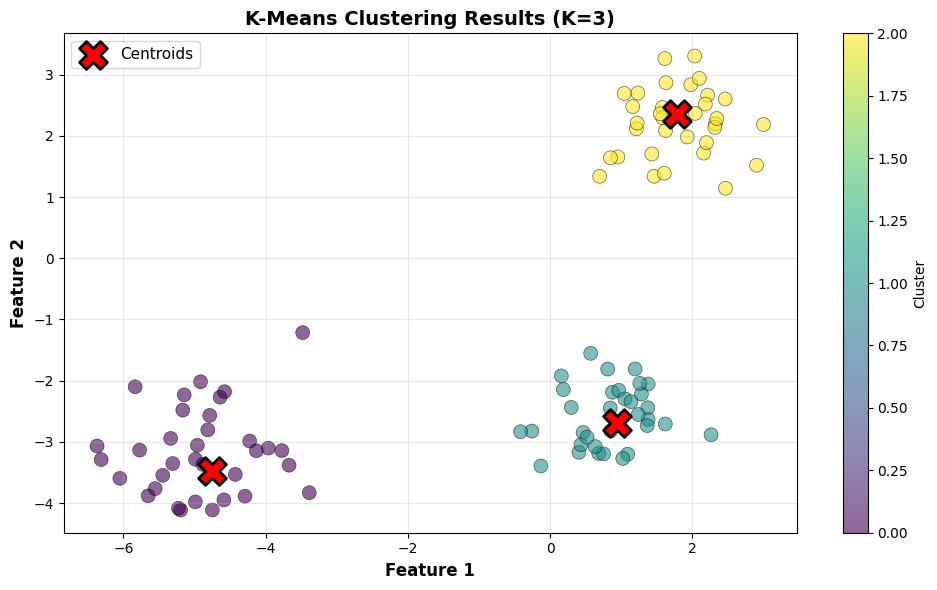

Note: The X markers show the final cluster centroids


In [18]:
# Visualize clustering results
plt.figure(figsize=(10, 6))

# Plot data points colored by cluster
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', 
                     s=100, alpha=0.6, edgecolors='black', linewidths=0.5)

# Plot centroids
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], 
           c='red', marker='X', s=400, edgecolors='black', 
           linewidths=2, label='Centroids')

plt.colorbar(scatter, label='Cluster')
plt.xlabel('Feature 1', fontsize=12, fontweight='bold')
plt.ylabel('Feature 2', fontsize=12, fontweight='bold')
plt.title('K-Means Clustering Results (K=3)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Note: The X markers show the final cluster centroids")

## Example 2: Elbow Method for Optimal K

The elbow method helps determine the optimal number of clusters by plotting inertia vs. number of clusters.

In [19]:
# Generate test data
X_elbow = make_classification_check_data(n_samples=150, n_classes=4, n_features=2, separability=4)[0]

print(f"Testing K values from 2 to 10 on {len(X_elbow)} samples...")
print("This may take a moment...\n")

# Test different values of K
K_range = range(2, 11)
inertias = []
silhouette_scores = []

for k in K_range:
    # Fit model
    model_k = KMeansClustering(
        n_clusters=k,
        max_iter=100,
        tolerance=1e-3,
        init='kmeans++',
        verbose=False,
    )
    model_k.fit(X_elbow)
    
    # Calculate inertia (negative of score)
    score = model_k.score(X_elbow)
    inertia = -score
    inertias.append(inertia)
    
    # Calculate silhouette score
    labels_k = model_k.predict(X_elbow)
    if len(np.unique(labels_k)) > 1:
        from machinegnostics.metrics import silhouette_score
        sil_score = silhouette_score(X_elbow, labels_k)
        silhouette_scores.append(sil_score)
    else:
        silhouette_scores.append(0)
    
    print(f"K={k}: Inertia={inertia:.2f}, Silhouette={silhouette_scores[-1]:.3f}")

print("\nElbow analysis complete!")

Testing K values from 2 to 10 on 150 samples...
This may take a moment...

K=2: Inertia=2024.22, Silhouette=0.681
K=3: Inertia=381.43, Silhouette=0.755
K=4: Inertia=144.66, Silhouette=0.722
K=5: Inertia=117.94, Silhouette=0.640
K=6: Inertia=111.18, Silhouette=0.480
K=7: Inertia=96.68, Silhouette=0.465
K=8: Inertia=92.89, Silhouette=0.398
K=9: Inertia=76.37, Silhouette=0.327
K=10: Inertia=76.96, Silhouette=0.456

Elbow analysis complete!


### Elbow Curve Visualization

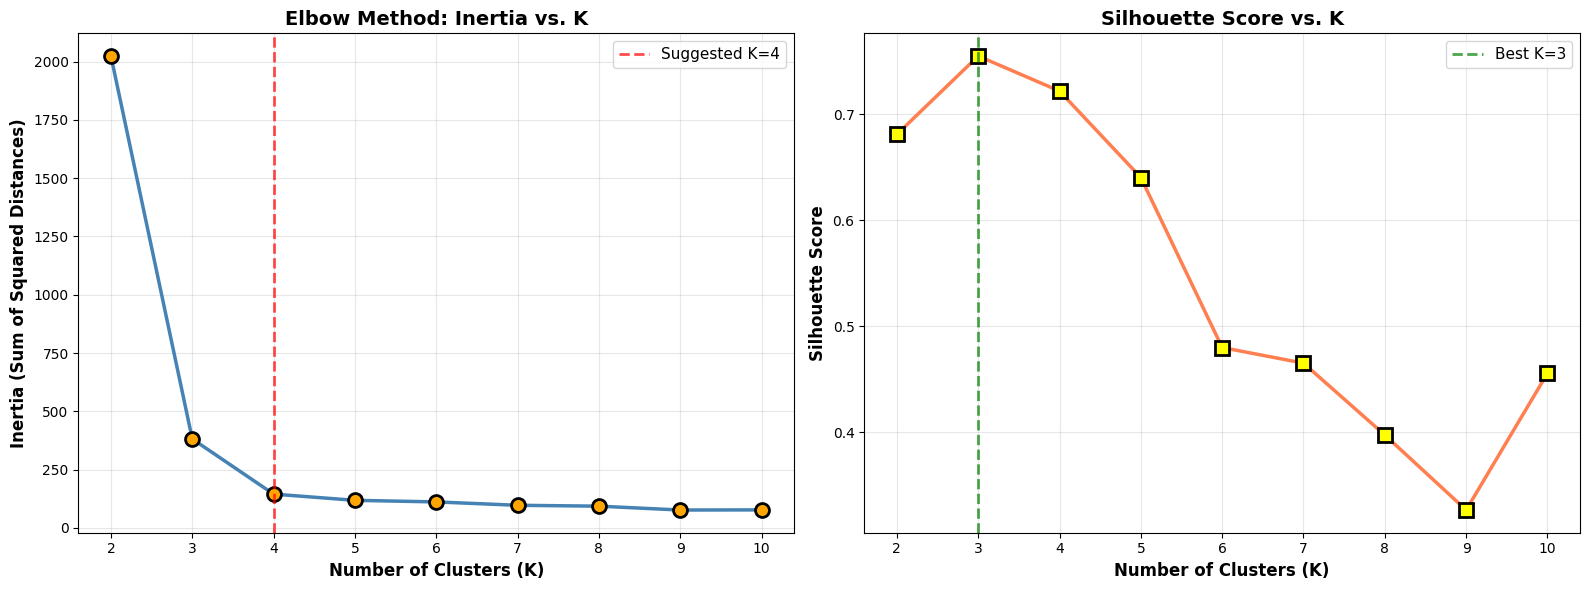


Elbow method suggests: K = 4
Silhouette score suggests: K = 3

Note: Look for the 'elbow' where the curve starts to flatten


In [20]:
# Plot elbow curve
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Inertia (Elbow curve)
ax1 = axes[0]
ax1.plot(K_range, inertias, marker='o', linewidth=2.5, markersize=10, 
        color='steelblue', markerfacecolor='orange', markeredgewidth=2, markeredgecolor='black')
ax1.set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Inertia (Sum of Squared Distances)', fontsize=12, fontweight='bold')
ax1.set_title('Elbow Method: Inertia vs. K', fontsize=14, fontweight='bold')
ax1.set_xticks(K_range)
ax1.grid(True, alpha=0.3)

# Add annotation for suggested elbow
# Find elbow using rate of change
diffs = np.diff(inertias)
second_diffs = np.diff(diffs)
elbow_idx = np.argmax(second_diffs) + 2  # +2 because of double diff
elbow_k = list(K_range)[elbow_idx]
ax1.axvline(elbow_k, color='red', linestyle='--', linewidth=2, alpha=0.7,
           label=f'Suggested K={elbow_k}')
ax1.legend(fontsize=11)

# Right plot: Silhouette score
ax2 = axes[1]
ax2.plot(K_range, silhouette_scores, marker='s', linewidth=2.5, markersize=10,
        color='coral', markerfacecolor='yellow', markeredgewidth=2, markeredgecolor='black')
ax2.set_xlabel('Number of Clusters (K)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax2.set_title('Silhouette Score vs. K', fontsize=14, fontweight='bold')
ax2.set_xticks(K_range)
ax2.grid(True, alpha=0.3)

# Find best K by silhouette
best_sil_idx = np.argmax(silhouette_scores)
best_sil_k = list(K_range)[best_sil_idx]
ax2.axvline(best_sil_k, color='green', linestyle='--', linewidth=2, alpha=0.7,
           label=f'Best K={best_sil_k}')
ax2.legend(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\nElbow method suggests: K = {elbow_k}")
print(f"Silhouette score suggests: K = {best_sil_k}")
print(f"\nNote: Look for the 'elbow' where the curve starts to flatten")

## Example 4: Convergence Analysis

Examine how the algorithm converges over iterations using history tracking.

In [21]:
# Fit model with history tracking
model_hist = KMeansClustering(
    n_clusters=4,
    max_iter=50,
    tolerance=1e-4,
    init='random',  # Use random init to see more iterations
    verbose=False,
    history=True,
    gnostic_characteristics=True,
)

model_hist.fit(X)

# Extract history
history = model_hist._history
iterations = [h['iteration'] for h in history]
losses = [h['h_loss'] if h['h_loss'] is not None else np.nan for h in history]
rentropies = [h['rentropy'] if h['rentropy'] is not None else np.nan for h in history]
inertias = [h['inertia'] if 'inertia' in h and h['inertia'] is not None else np.nan for h in history]

print(f"Model converged after {len(history)-1} iterations")
print(f"Final loss: {losses[-1]:.6f}")
print(f"Final rentropy: {rentropies[-1]:.6f}")
print(f"Final inertia: {inertias[-1]:.2f}")

Model converged after 49 iterations
Final loss: 73.674364
Final rentropy: 0.252035
Final inertia: 84.19


### Convergence Visualization

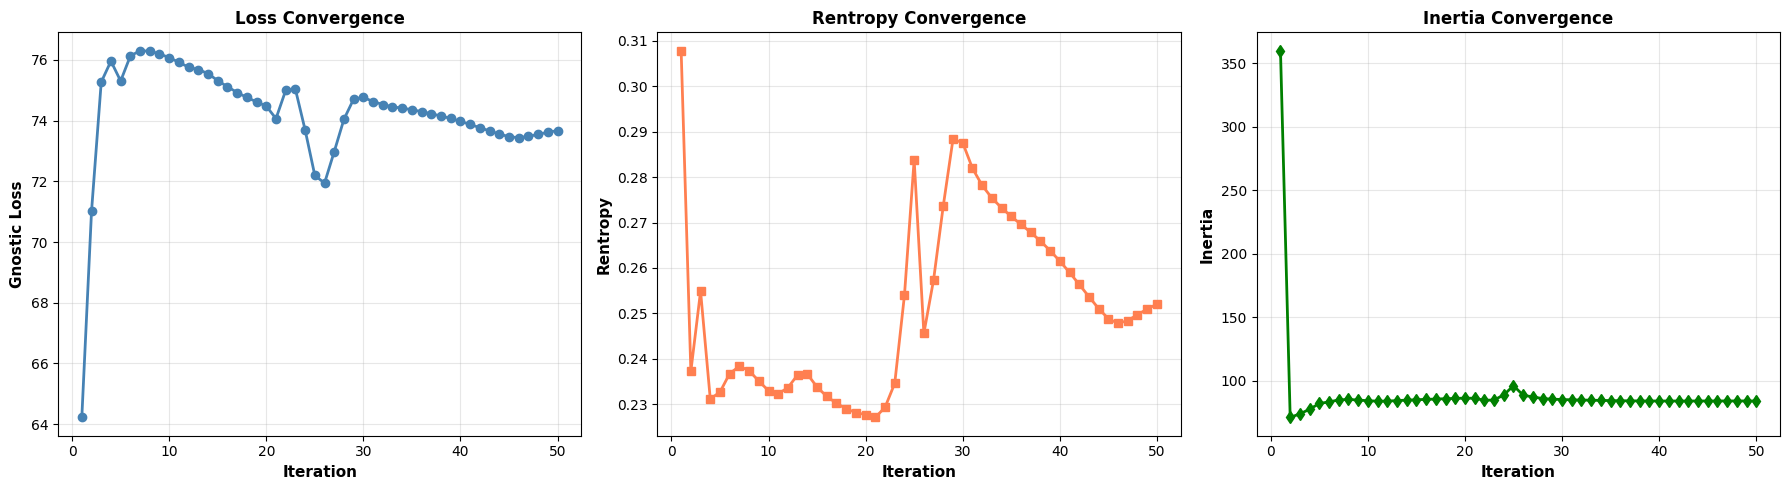

Note: These plots show how the algorithm optimizes over iterations
Lower loss, rentropy, and inertia indicate better clustering


In [22]:
# Plot convergence metrics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loss convergence
axes[0].plot(iterations, losses, marker='o', linewidth=2, markersize=6, color='steelblue')
axes[0].set_xlabel('Iteration', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Gnostic Loss', fontsize=11, fontweight='bold')
axes[0].set_title('Loss Convergence', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Rentropy convergence
axes[1].plot(iterations, rentropies, marker='s', linewidth=2, markersize=6, color='coral')
axes[1].set_xlabel('Iteration', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Rentropy', fontsize=11, fontweight='bold')
axes[1].set_title('Rentropy Convergence', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

# Inertia convergence
axes[2].plot(iterations, inertias, marker='d', linewidth=2, markersize=6, color='green')
axes[2].set_xlabel('Iteration', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Inertia', fontsize=11, fontweight='bold')
axes[2].set_title('Inertia Convergence', fontsize=12, fontweight='bold')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Note: These plots show how the algorithm optimizes over iterations")
print("Lower loss, rentropy, and inertia indicate better clustering")